In [14]:
#importando dados e bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../../../data/mock.csv')
df = pd.DataFrame(data)
df.head()

,Carimbo de data/hora,Tive dificuldade em me acalmar.,Percebi que estava com a boca seca.,Eu não consegui ter sentimentos positivos.,"Senti dificuldade em respirar (por exemplo, respiração excessivamente rápida ou falta de respiração na ausência de esforço físico).",Foi difícil ter iniciativa para fazer coisas.,"Em geral, tive reações exageradas em certas situações.","Tive tremores (por exemplo, das mãos ou das pernas).",Eu senti que estava bastante nervoso(a).,Eu fiquei preocupado(a) com situações que eu poderia entrar em pânico e fazer papel de bobo(a).,...,Você concorda com os termos de serviço?,Nome completo:,E-mail para envio das informações da pesquisa - (cópia do termo de consentimento e relatório da pesquisa):,Idade:,Grau de escolaridade:,Sexo:,Estado (UF) do seu nascimento:,Profissão:,Ocupa cargo de gestão/liderança?,Confirme seu e-mail:
0,18/08/2023 10:23:07,2,1,3,0,2,1,3,0,2,...,Sim,Junior Silva,daniel@gmail.com,19-30,Ensino Fundamental incompleto,Masculino,SP,construtor,Não,daniel@gmail.com
1,18/08/2023 10:23:07,2,2,3,4,2,3,1,2,3,...,Sim,Marina Silva,marina@gmail.com,19-30,Ensino Fundamental completo,Feminino,SP,construtor,Sim,marina@gmail.com
2,18/08/2023 16:03:02,0,1,1,1,3,0,3,1,3,...,Sim,Natael Sampaio,natael_engenheiro@gmail.com,31-40,Ensino Médio completo,Masculino,SP,Engenheiro,Não,natael_engenheiro@gmail.com
3,18/08/2023 16:30:03,3,3,3,3,3,3,3,3,3,...,Sim,Caroline Yu,carol@beheart.app,31-40,Ensino Superior completo,Feminino,SP,Publi,Sim,carol@beheart.app
4,18/08/2023 16:39:13,2,1,1,3,0,2,3,1,3,...,Sim,Junior Dantas,junior@gmail.com,61-70,Ensino Fundamental completo,Masculino,MG,Vendedor,Sim,outroemail@gmail.com


In [15]:
#tratando o df
colunas = ['time_stamp']+[f'pergunta_{str(numero).zfill(2)}' for numero in range(1, 22)] + ['termos','nome', 'cpf','idade','educacao','sexo','estado','trabalho','funcao','mail']
print(len(colunas), data.shape[1])
data.columns = colunas
df.head()


32 32


,time_stamp,pergunta_01,pergunta_02,pergunta_03,pergunta_04,pergunta_05,pergunta_06,pergunta_07,pergunta_08,pergunta_09,...,termos,nome,cpf,idade,educacao,sexo,estado,trabalho,funcao,mail
0,18/08/2023 10:23:07,2,1,3,0,2,1,3,0,2,...,Sim,Junior Silva,daniel@gmail.com,19-30,Ensino Fundamental incompleto,Masculino,SP,construtor,Não,daniel@gmail.com
1,18/08/2023 10:23:07,2,2,3,4,2,3,1,2,3,...,Sim,Marina Silva,marina@gmail.com,19-30,Ensino Fundamental completo,Feminino,SP,construtor,Sim,marina@gmail.com
2,18/08/2023 16:03:02,0,1,1,1,3,0,3,1,3,...,Sim,Natael Sampaio,natael_engenheiro@gmail.com,31-40,Ensino Médio completo,Masculino,SP,Engenheiro,Não,natael_engenheiro@gmail.com
3,18/08/2023 16:30:03,3,3,3,3,3,3,3,3,3,...,Sim,Caroline Yu,carol@beheart.app,31-40,Ensino Superior completo,Feminino,SP,Publi,Sim,carol@beheart.app
4,18/08/2023 16:39:13,2,1,1,3,0,2,3,1,3,...,Sim,Junior Dantas,junior@gmail.com,61-70,Ensino Fundamental completo,Masculino,MG,Vendedor,Sim,outroemail@gmail.com


## Dados demográficos

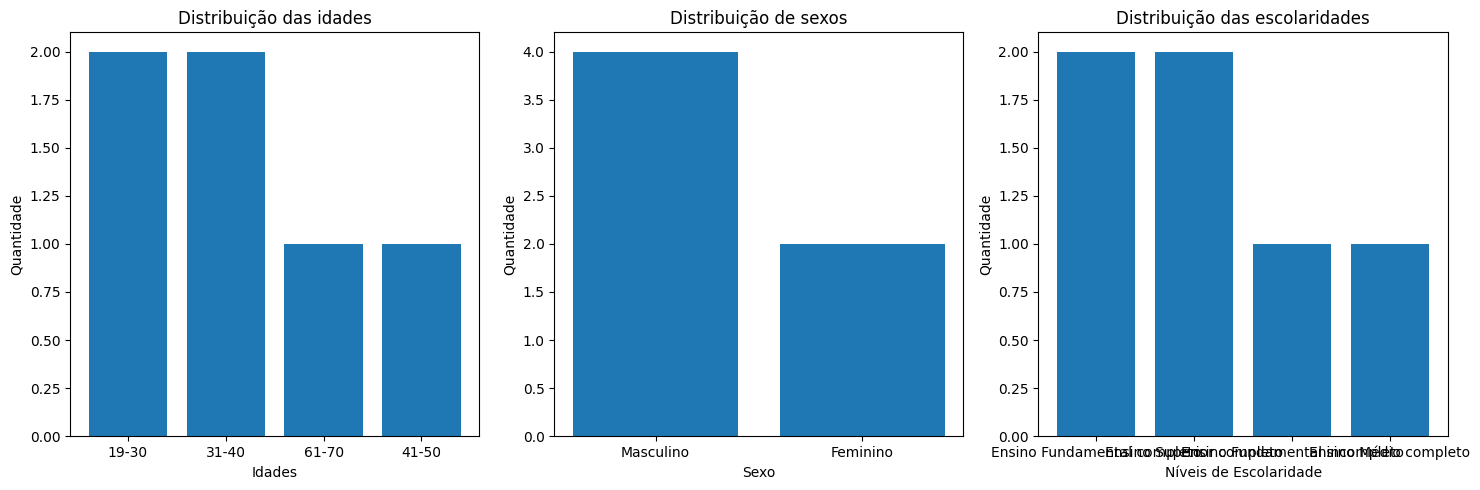

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#gráfico idade
count_idade = df['idade'].value_counts()
axs[0].bar(count_idade.index, count_idade.values)
axs[0].set_xlabel('Idades')
axs[0].set_ylabel('Quantidade')
axs[0].set_title('Distribuição das idades')

#gráfico gênero
count_genero = df['sexo'].value_counts()
axs[1].bar(count_genero.index, count_genero.values)
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Quantidade')
axs[1].set_title('Distribuição de sexos')

#gráfico escolaridade
count_escolaridade = df['educacao'].value_counts()
axs[2].bar(count_escolaridade.index, count_escolaridade.values)
axs[2].set_xlabel('Níveis de Escolaridade')
axs[2].set_ylabel('Quantidade')
axs[2].set_title('Distribuição das escolaridades')

plt.tight_layout()
plt.show()



## Análise 
